# Import libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Import data

In [4]:
world_ranking = pd.read_csv('/content/fifa_ranking_2022-10-06.csv') # Country/Team wise ranking till 2022
world_cup = pd.read_csv('/content/world_cup.csv')                   # Year wise country winner
matches = pd.read_csv('/content/matches_1930_2022.csv')             # Match ficture details

In [5]:
world_ranking.head()

,team,team_code,association,rank,previous_rank,points,previous_points
0,Brazil,BRA,CONMEBOL,1,1,1841.30,1837.56
1,Belgium,BEL,UEFA,2,2,1816.71,1821.92
2,Argentina,ARG,CONMEBOL,3,3,1773.88,1770.65
3,France,FRA,UEFA,4,4,1759.78,1764.85
4,England,ENG,UEFA,5,5,1728.47,1737.46


In [6]:
world_cup.head()

,Year,Host,Teams,Champion,Runner-Up,TopScorrer,Attendance,AttendanceAvg,Matches
0,2022,Qatar,32,Argentina,France,Kylian Mbappé - 8,3404252,53191,64
1,2018,Russia,32,France,Croatia,Harry Kane - 6,3031768,47371,64
2,2014,Brazil,32,Germany,Argentina,James Rodríguez - 6,3429873,53592,64
3,2010,South Africa,32,Spain,Netherlands,"Wesley Sneijder, Thomas Müller... - 5",3178856,49670,64
4,2006,Germany,32,Italy,France,Miroslav Klose - 5,3352605,52384,64


In [7]:
matches.head()

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_penalty_shootout_miss_long,away_penalty_shootout_miss_long,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,...,NaN,"['3|1:1|Kingsley Coman', '5|2:1|Aurélien Tchou...",NaN,NaN,NaN,NaN,"['45+7&rsquor;|2:0|Enzo Fernández', '90+8&rsqu...","['55&rsquor;|2:0|Adrien Rabiot', '87&rsquor;|2...",['64&rsquor;|2:0|Marcos Acuña|for Ángel Di Mar...,['41&rsquor;|2:0|Randal Kolo Muani|for Ousmane...
1,Croatia,Morocco,2,0.7,NaN,1,1.2,NaN,Zlatko Dalić,Luka Modrić,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['69&rsquor;|2:1|Azzedine Ounahi', '84&rsquor;...",['61&rsquor;|2:1|Nikola Vlašić|for Andrej Kram...,['46&rsquor;|2:1|Ilias Chair|for Abdelhamid Sa...
2,France,Morocco,2,2.0,NaN,0,0.9,NaN,Didier Deschamps,Hugo Lloris,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['27&rsquor;|1:0|Sofiane Boufal'],['65&rsquor;|1:0|Marcus Thuram|for Olivier Gir...,['21&rsquor;|1:0|Selim Amallah|for Romain Saïs...
3,Argentina,Croatia,3,2.3,NaN,0,0.5,NaN,Lionel Scaloni,Lionel Messi,...,NaN,NaN,NaN,NaN,NaN,NaN,"['68&rsquor;|2:0|Cristian Romero', '71&rsquor;...","['32&rsquor;|0:0|Mateo Kovačić', '32&rsquor;|0...",['62&rsquor;|2:0|Lisandro Martínez|for Leandro...,"['46&rsquor;|2:0|Mislav Oršić|for Borna Sosa',..."
4,Morocco,Portugal,1,1.4,NaN,0,0.9,NaN,Hoalid Regragui,Romain Saïss,...,NaN,NaN,NaN,NaN,Walid Cheddira · 90+3,NaN,"['70&rsquor;|1:0|Achraf Dari', '90+1&rsquor;|1...",['87&rsquor;|1:0|Vitinha'],['57&rsquor;|1:0|Achraf Dari|for Romain Saïss'...,['51&rsquor;|1:0|João Cancelo|for Raphaël Guer...


# Basic EDA

## Total number of matches played

In [8]:
total_num_matches = len(matches)
print(f'Total number of matches played: {total_num_matches} matches')

Total number of matches played: 964 matches


## Total goals scored

In [9]:
total_goals = sum(matches['home_score']+matches['away_score'])
print(f'Total number of goals scored: {total_goals} goals')

Total number of goals scored: 2720 goals


## Average goals scored

In [10]:
avg_goals = total_goals/total_num_matches
print(f'Average goals scored: {round(avg_goals,2)} goals')

Average goals scored: 2.82 goals


## Total attendance over time

In [11]:
print(f"Total attendance over time: {sum(matches['Attendance'])}")

Total attendance over time: 44048413


In [12]:
# sort matches['Attendance'] on the basis of dates in ascending order then we can plot a grpah for attendance over time

## Average attendance

In [13]:
avg_att = sum(matches['Attendance'])/len(matches)
print(f"Average attendance: {round(avg_att,2)}")

Average attendance: 45693.37


## Winner, First runnerup & Second runnerup

### Winner

In [14]:
winner = world_cup['Champion'].value_counts().reset_index()
winner

,Champion,count
0,Brazil,5
1,Italy,4
2,Argentina,3
3,France,2
4,Germany,2
5,West Germany,2
6,Uruguay,2
7,Spain,1
8,England,1


In [15]:
fig = px.pie(winner, names = 'Champion', values = 'count', title = 'Fifa world cup Winner')

fig.update_traces(textinfo = 'label+value')
fig.show()

### First runnerup and Second runnerup

In [16]:
matches['Round'].value_counts().reset_index()

,Round,count
0,Group stage,587
1,Round of 16,97
2,Quarter-finals,70
3,First round,48
4,Semi-finals,38
5,First group stage,36
6,Second round,24
7,Final,21
8,Third-place match,20
9,Second group stage,12


In [17]:
matches['home_penalty'].fillna(0, inplace = True)
matches['away_penalty'].fillna(0, inplace = True)

In [18]:
matches['h_total'] = matches['home_score'] + matches['home_penalty']
matches['a_total'] = matches['away_score'] + matches['away_penalty']

In [19]:
runner1 = matches[matches['Round'] == 'Final']
runner2 = matches[matches['Round'] == 'Third-place match']

In [20]:
def get_runner1(df):
  if df['h_total'] > df['a_total']:
    return df['away_team']
  else:
    return df['home_team']


def get_runner2(df):
  if df['h_total'] > df['a_total']:
    return df['home_team']
  else:
    return df['away_team']

In [21]:
runner1['Runnerup'] = runner1.apply(get_runner1, axis = 1)
runner2['Runnerup'] = runner2.apply(get_runner2, axis = 1)

<ipython-input-21-3172525eb9c2>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-21-3172525eb9c2>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
runner1[['home_team','away_team','h_total','a_total','Runnerup']]

,home_team,away_team,h_total,a_total,Runnerup
0,Argentina,France,7.0,5.0,France
64,France,Croatia,4.0,2.0,Croatia
128,Germany,Argentina,1.0,0.0,Argentina
192,Netherlands,Spain,0.0,1.0,Netherlands
256,Italy,France,6.0,4.0,France
320,Germany,Brazil,0.0,2.0,Germany
384,Brazil,France,0.0,3.0,Brazil
448,Brazil,Italy,3.0,2.0,Italy
500,West Germany,Argentina,1.0,0.0,Argentina
552,Argentina,West Germany,3.0,2.0,West Germany


In [23]:
runner2[['home_team','away_team','h_total','a_total','Runnerup']]

,home_team,away_team,h_total,a_total,Runnerup
1,Croatia,Morocco,2.0,1.0,Croatia
65,Belgium,England,2.0,0.0,Belgium
129,Brazil,Netherlands,0.0,3.0,Netherlands
193,Uruguay,Germany,2.0,3.0,Germany
257,Germany,Portugal,3.0,1.0,Germany
321,Korea Republic,Türkiye,2.0,3.0,Türkiye
385,Netherlands,Croatia,1.0,2.0,Croatia
449,Sweden,Bulgaria,4.0,0.0,Sweden
501,Italy,England,2.0,1.0,Italy
553,France,Belgium,4.0,2.0,France


In [24]:
runner1.Runnerup.value_counts()

,count
Runnerup,
Argentina,3
Netherlands,3
West Germany,3
France,2
Italy,2
Czechoslovakia,2
Hungary,2
Croatia,1
Germany,1


In [25]:
runner2.Runnerup.value_counts()

,count
Runnerup,
Germany,3
Croatia,2
France,2
Poland,2
Brazil,2
Belgium,1
Netherlands,1
Türkiye,1
Sweden,1


In [26]:
r1 = go.Bar(x = runner1.Runnerup.value_counts().index, y = runner1.Runnerup.value_counts().values, name = 'First Runnerup')
r2 = go.Bar(x = runner2.Runnerup.value_counts().index, y = runner2.Runnerup.value_counts().values, name = 'Second Runnerup')

In [27]:
fig = make_subplots(rows = 1, cols = 2, subplot_titles = ('First Runnerup', 'Second Runnerup'))

fig.add_trace(r1, row = 1, col = 1)
fig.add_trace(r2, row = 1, col = 2)

fig.update_layout(title_text = 'First and Second Runnerup Chart')


## Conclusions
- Brazil won the most number of titles followed by Italy and Argentina
- Argentina, Netherlands and West Germany won the titles for first runnerups
- Germany was the second runnerup for most of the times

## Year-wise what team participation

In [28]:
team_list = matches.groupby('Year').agg(home = ('home_team', list), away = ('away_team', list))
team_list

,home,away
Year,,
1930,"[Uruguay, Uruguay, Argentina, Argentina, Urugu...","[Argentina, Yugoslavia, United States, Chile, ..."
1934,"[Italy, Germany, Czechoslovakia, Italy, Italy,...","[Czechoslovakia, Austria, Germany, Austria, Sp..."
1938,"[Brazil, Italy, Hungary, Italy, Brazil, Sweden...","[Sweden, Hungary, Sweden, Brazil, Czechoslovak..."
1950,"[Sweden, Uruguay, Brazil, Uruguay, Brazil, Uru...","[Spain, Brazil, Spain, Sweden, Sweden, Spain, ..."
1954,"[Germany, Austria, Hungary, Germany, Germany, ...","[Hungary, Uruguay, Uruguay, Austria, Yugoslavi..."
1958,"[Brazil, France, Sweden, Brazil, France, West ...","[Sweden, West Germany, West Germany, France, N..."
1962,"[Brazil, Chile, Brazil, Czechoslovakia, Chile,...","[Czechoslovakia, Yugoslavia, Chile, Yugoslavia..."
1966,"[England, Portugal, England, West Germany, Por...","[West Germany, Soviet Union, Portugal, Soviet ..."
1970,"[Brazil, West Germany, Italy, Brazil, Brazil, ...","[Italy, Uruguay, West Germany, Uruguay, Peru, ..."


In [29]:
team_list['Teams'] = team_list.apply(lambda x: list(set(x['home'] + x['away'])), axis = 1)
team_list['#'] = team_list['Teams'].apply(len)

In [30]:
team_list['Teams']

# The index is year and the teams column consists of data in a list

,Teams
Year,
1930,"[Argentina, Paraguay, Mexico, Bolivia, Belgium..."
1934,"[Argentina, Czechoslovakia, Belgium, Austria, ..."
1938,"[Czechoslovakia, Dutch East Indies, Belgium, G..."
1950,"[Paraguay, Mexico, Bolivia, Uruguay, Italy, Yu..."
1954,"[Czechoslovakia, Mexico, Korea Republic, Belgi..."
1958,"[Argentina, Paraguay, Czechoslovakia, Mexico, ..."
1962,"[Argentina, Czechoslovakia, Mexico, Spain, Uru..."
1966,"[Argentina, Mexico, Uruguay, Italy, England, F..."
1970,"[Czechoslovakia, Mexico, Morocco, Belgium, El ..."


In [31]:
# explode breaks the teams columns and sorts based on index
team_list['Teams'].explode().reset_index()

# The team column consisting of data in a list is broken down into smaller parts based on

,Year,Teams
0,1930,Argentina
1,1930,Paraguay
2,1930,Mexico
3,1930,Bolivia
4,1930,Belgium
...,...,...
484,2022,Netherlands
485,2022,Qatar
486,2022,Germany
487,2022,Tunisia


In [32]:
team_list_pivot = team_list['Teams'].explode().reset_index().pivot(index = 'Year', columns = 'Teams', values = 'Year').T

In [33]:
team_list_pivot.head()

Year,1930,1934,1938,1950,1954,1958,1962,1966,1970,1974,...,1986,1990,1994,1998,2002,2006,2010,2014,2018,2022
Teams,,,,,,,,,,,,,,,,,,,,,
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1986.0,NaN,NaN,NaN,NaN,NaN,2010.0,2014.0,NaN,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2006.0,NaN,NaN,NaN,NaN
Argentina,1930.0,1934.0,NaN,NaN,NaN,1958.0,1962.0,1966.0,NaN,1974.0,...,1986.0,1990.0,1994.0,1998.0,2002.0,2006.0,2010.0,2014.0,2018.0,2022.0
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1974.0,...,NaN,NaN,NaN,NaN,NaN,2006.0,2010.0,2014.0,2018.0,2022.0
Austria,NaN,1934.0,NaN,NaN,1954.0,1958.0,NaN,NaN,NaN,NaN,...,NaN,1990.0,NaN,1998.0,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
team_list_pivot.fillna(0, inplace = True)

In [35]:
team_list_pivot

Year,1930,1934,1938,1950,1954,1958,1962,1966,1970,1974,...,1986,1990,1994,1998,2002,2006,2010,2014,2018,2022
Teams,,,,,,,,,,,,,,,,,,,,,
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1986.0,0.0,0.0,0.0,0.0,0.0,2010.0,2014.0,0.0,0.0
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2006.0,0.0,0.0,0.0,0.0
Argentina,1930.0,1934.0,0.0,0.0,0.0,1958.0,1962.0,1966.0,0.0,1974.0,...,1986.0,1990.0,1994.0,1998.0,2002.0,2006.0,2010.0,2014.0,2018.0,2022.0
Australia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1974.0,...,0.0,0.0,0.0,0.0,0.0,2006.0,2010.0,2014.0,2018.0,2022.0
Austria,0.0,1934.0,0.0,0.0,1954.0,1958.0,0.0,0.0,0.0,0.0,...,0.0,1990.0,0.0,1998.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,1930.0,0.0,0.0,1950.0,1954.0,0.0,1962.0,1966.0,1970.0,1974.0,...,1986.0,1990.0,0.0,0.0,2002.0,0.0,2010.0,2014.0,2018.0,2022.0
Wales,0.0,0.0,0.0,0.0,0.0,1958.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022.0
West Germany,0.0,0.0,0.0,0.0,0.0,1958.0,1962.0,1966.0,1970.0,1974.0,...,1986.0,1990.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
team_list_pivot = team_list_pivot.applymap(lambda x: 1 if x > 0 else 0)

<ipython-input-36-5b6883627fb6>:1: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



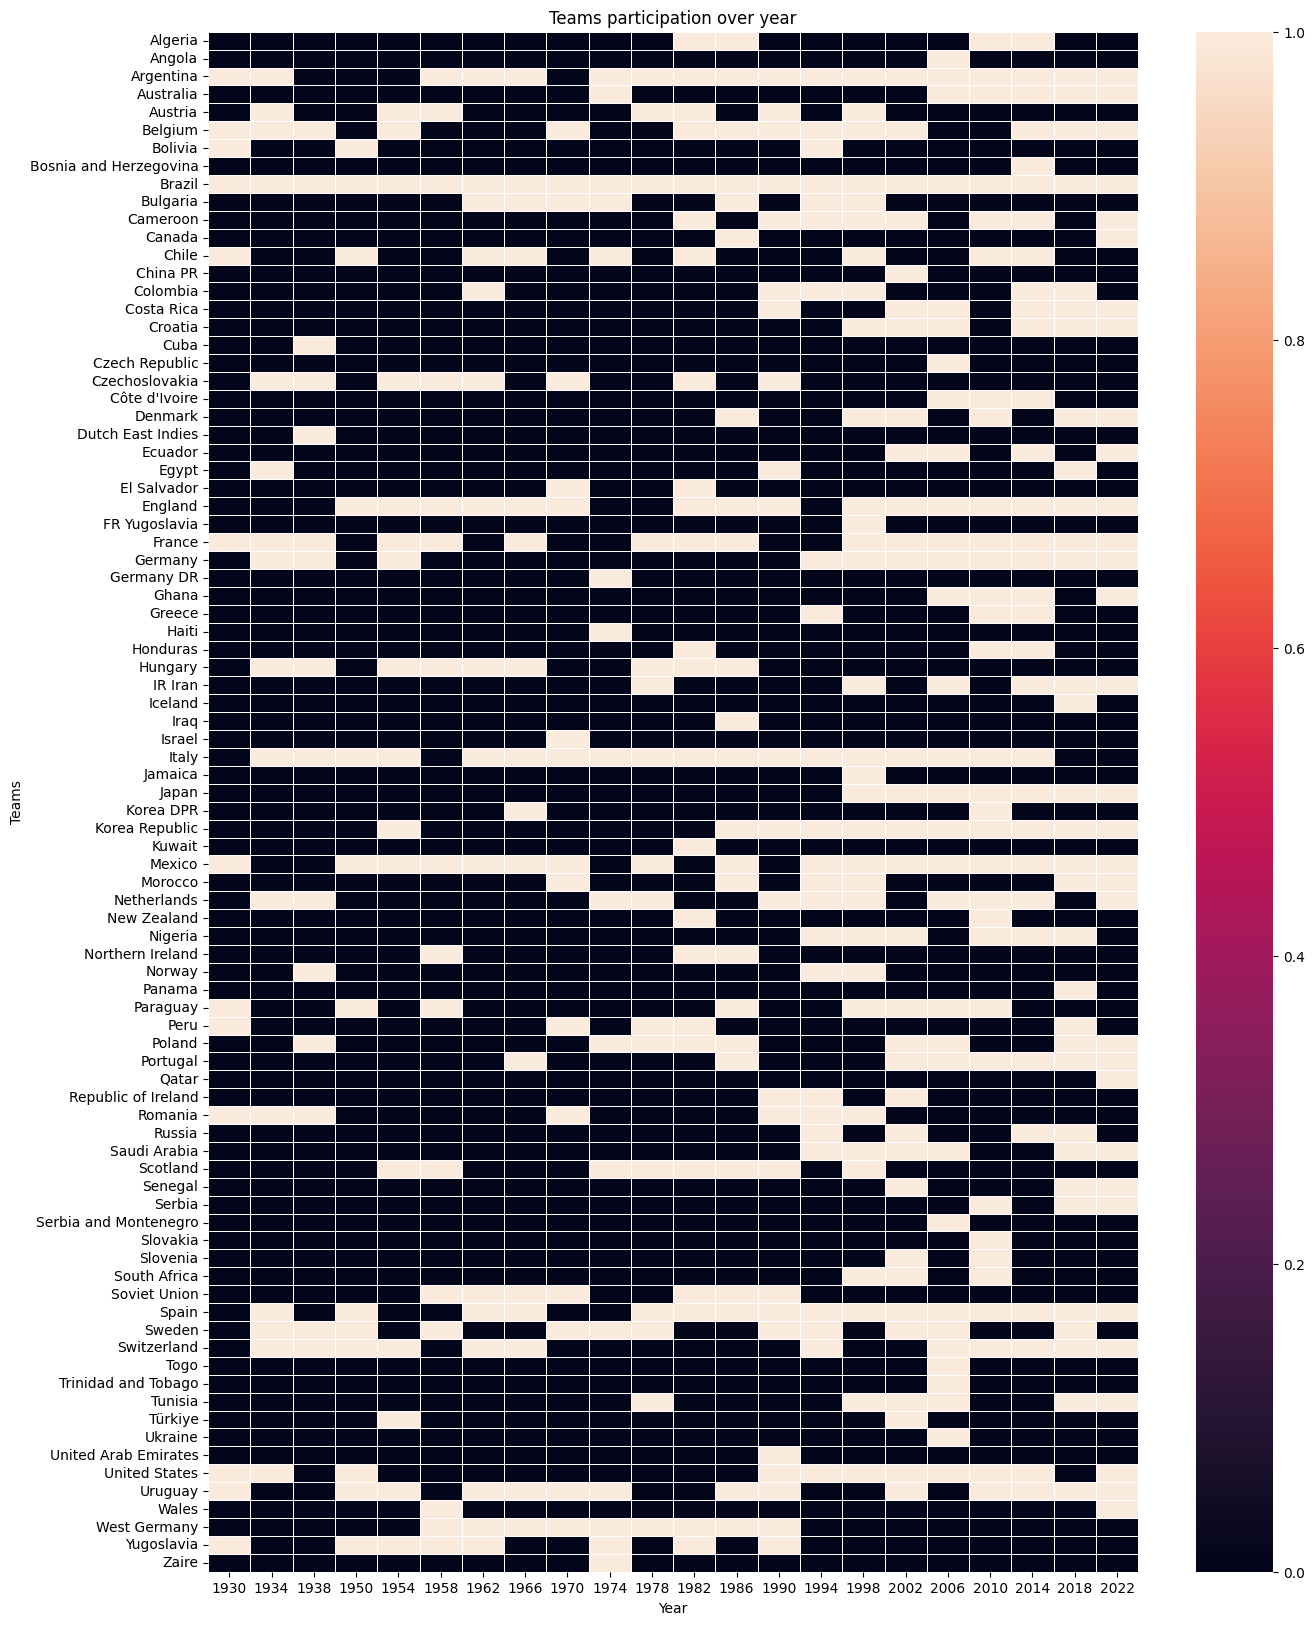

In [37]:
plt.figure(figsize = (15, 20))
sns.heatmap(team_list_pivot, linecolor = 'white', linewidth = 0.5)
plt.title('Teams participation over year')
plt.xlabel('Year')
plt.ylabel('Teams')
plt.show()

### Total number of Fifa seasons a team played

In [38]:
team_played = pd.DataFrame()

In [39]:
team_played = team_list_pivot.sum(axis = 1)
team_played = team_played.reset_index()
team_played.rename(columns = {'index': 'Team', 0: 'Appeared'}, inplace = True)

#### Team that played most number of times

In [40]:
team_played[team_played['Appeared'] == max(team_played['Appeared'])]

,Teams,Appeared
8,Brazil,22


#### Teams that played 5 times and under

In [41]:
team_played[team_played['Appeared'] <= 5]

,Teams,Appeared
0,Algeria,4
1,Angola,1
6,Bolivia,3
7,Bosnia and Herzegovina,1
11,Canada,2
13,China PR,1
17,Cuba,1
18,Czech Republic,1
20,Côte d'Ivoire,3
22,Dutch East Indies,1


#### Team that played minimun number of times

In [42]:
team_played[team_played['Appeared'] == min(team_played['Appeared'])]

,Teams,Appeared
1,Angola,1
7,Bosnia and Herzegovina,1
13,China PR,1
17,Cuba,1
18,Czech Republic,1
22,Dutch East Indies,1
27,FR Yugoslavia,1
30,Germany DR,1
33,Haiti,1
37,Iceland,1


## Conslusion
- Brazil is the only country to participate in all Fifa world cups
- Qatar, Serbia, Iran, etc. have recently started playing
- UAE, Jamaica, Iraq have played only one match till date

## Change in rank of teams

In [43]:
world_ranking

,team,team_code,association,rank,previous_rank,points,previous_points
0,Brazil,BRA,CONMEBOL,1,1,1841.30,1837.56
1,Belgium,BEL,UEFA,2,2,1816.71,1821.92
2,Argentina,ARG,CONMEBOL,3,3,1773.88,1770.65
3,France,FRA,UEFA,4,4,1759.78,1764.85
4,England,ENG,UEFA,5,5,1728.47,1737.46
...,...,...,...,...,...,...,...
206,Sri Lanka,SRI,AFC,207,207,825.25,825.25
207,US Virgin Islands,VIR,CONCACAF,208,208,823.97,823.97
208,British Virgin Islands,VGB,CONCACAF,209,209,809.32,809.32
209,Anguilla,AIA,CONCACAF,210,210,790.74,790.74


In [44]:
same_rank = world_ranking[world_ranking['rank'] == world_ranking['previous_rank']]['team'].tolist()
same_rank

['Brazil',
 'Belgium',
 'Argentina',
 'France',
 'England',
 'Netherlands',
 'Portugal',
 'Denmark',
 'Germany',
 'Colombia',
 'Senegal',
 'Wales',
 'Japan',
 'Poland',
 'Ukraine',
 'Korea Republic',
 'Chile',
 'Tunisia',
 'Ecuador',
 'Mali',
 'Albania',
 'Oman',
 'Israel',
 'Uzbekistan',
 'Honduras',
 'Guinea',
 'Bahrain',
 'Benin',
 'Palestine',
 'Kyrgyz Republic',
 'Equatorial Guinea',
 'Thailand',
 'Korea DPR',
 'Guatemala',
 'Turkmenistan',
 'Ethiopia',
 'St Kitts and Nevis',
 'Burundi',
 'Kuwait',
 'Liberia',
 'Chinese Taipei',
 'Myanmar',
 'Tahiti',
 'Fiji',
 'Vanuatu',
 'South Sudan',
 'Barbados',
 'Cuba',
 'Puerto Rico',
 'Mauritius',
 'Chad',
 'Macau',
 'American Samoa',
 'Cook Islands',
 'Brunei Darussalam',
 'Samoa',
 'Bangladesh',
 'Djibouti',
 'Tonga',
 'Guam',
 'Turks and Caicos Islands',
 'Sri Lanka',
 'US Virgin Islands',
 'British Virgin Islands',
 'Anguilla',
 'San Marino']

In [45]:
rank_decreased = world_ranking[world_ranking['rank'] < world_ranking['previous_rank']]['team'].tolist()
rank_decreased

['Italy',
 'Croatia',
 'Switzerland',
 'IR Iran',
 'Serbia',
 'Morocco',
 'Costa Rica',
 'Russia',
 'Hungary',
 'Algeria',
 'Australia',
 'Egypt',
 'Scotland',
 'Canada',
 'Paraguay',
 "Côte d'Ivoire",
 'Saudi Arabia',
 'Romania',
 'Burkina Faso',
 'Finland',
 'Panama',
 'Iceland',
 'Slovenia',
 'South Africa',
 'Iraq',
 'Cabo Verde',
 'Bulgaria',
 'Georgia',
 'Jordan',
 'Haiti',
 'Uganda',
 'Luxembourg',
 'Vietnam',
 'Lebanon',
 'Kenya',
 'Madagascar',
 'Mauritania',
 'Tajikistan',
 'Estonia',
 'Kazakhstan',
 'Mozambique',
 'Namibia',
 'Angola',
 'Libya',
 'Faroe Islands',
 'Azerbaijan',
 'Sudan',
 'Tanzania',
 'Antigua and Barbuda',
 'Central African Republic',
 'Philippines',
 'Solomon Islands',
 'Suriname',
 'Eswatini',
 'Hong Kong',
 'Malaysia',
 'Andorra',
 'Indonesia',
 'Maldives',
 'Papua New Guinea',
 'Malta',
 'Guyana',
 'St Lucia',
 'Moldova',
 'Nepal',
 'St Vincent and the Grenadines',
 'Mongolia',
 'Dominica',
 'Bhutan',
 'São Tomé and Príncipe',
 'Pakistan',
 'Cayman Isla

In [46]:
rank_increased = world_ranking[world_ranking['rank'] > world_ranking['previous_rank']]['team'].tolist()
rank_increased

['Spain',
 'Mexico',
 'Uruguay',
 'USA',
 'Peru',
 'Sweden',
 'Nigeria',
 'Austria',
 'Czechia',
 'Norway',
 'Cameroon',
 'Türkiye',
 'Republic of Ireland',
 'Qatar',
 'Greece',
 'Slovakia',
 'Venezuela',
 'Bosnia and Herzegovina',
 'Northern Ireland',
 'Ghana',
 'Jamaica',
 'North Macedonia',
 'Montenegro',
 'United Arab Emirates',
 'Congo DR',
 'El Salvador',
 'China PR',
 'Gabon',
 'Bolivia',
 'Curaçao',
 'Zambia',
 'Syria',
 'Armenia',
 'Belarus',
 'Congo',
 'Trinidad and Tobago',
 'New Zealand',
 'India',
 'Kosovo',
 'Cyprus',
 'Guinea-Bissau',
 'Sierra Leone',
 'Niger',
 'Malawi',
 'Zimbabwe',
 'The Gambia',
 'Togo',
 'Comoros',
 'Latvia',
 'Rwanda',
 'Nicaragua',
 'Lithuania',
 'Lesotho',
 'Botswana',
 'Dominican Republic',
 'Yemen',
 'Afghanistan',
 'Singapore',
 'New Caledonia',
 'Bermuda',
 'Grenada',
 'Belize',
 'Cambodia',
 'Montserrat',
 'Laos',
 'Liechtenstein',
 'Seychelles',
 'Gibraltar']

In [47]:
print(f'Teams that have same rank: {len(same_rank)}')
print(f'Teams that have decreased rank: {len(rank_decreased)}')
print(f'Teams that have increased rank: {len(rank_increased)}')

Teams that have same rank: 66
Teams that have decreased rank: 77
Teams that have increased rank: 68


In [48]:
max_len = max(len(same_rank), len(rank_decreased), len(rank_increased))
max_len

77

In [49]:
same_rank += [None]*(max_len - len(same_rank))
rank_decreased += [None]*(max_len - len(rank_decreased))
rank_increased += [None]*(max_len - len(rank_increased))

In [50]:
rank = pd.DataFrame({'same_rank': same_rank, 'rank_decreased': rank_decreased, 'rank_increased': rank_increased})
rank

,same_rank,rank_decreased,rank_increased
0,Brazil,Italy,Spain
1,Belgium,Croatia,Mexico
2,Argentina,Switzerland,Uruguay
3,France,IR Iran,USA
4,England,Serbia,Peru
...,...,...,...
72,None,Timor-Leste,None
73,None,Eritrea,None
74,None,Aruba,None
75,None,Bahamas,None


In [51]:
rank.isnull().sum()

,0
same_rank,11
rank_decreased,0
rank_increased,9


In [52]:
rank.fillna('', inplace = True)

In [53]:
rank.isnull().sum()

,0
same_rank,0
rank_decreased,0
rank_increased,0


In [54]:
rank

,same_rank,rank_decreased,rank_increased
0,Brazil,Italy,Spain
1,Belgium,Croatia,Mexico
2,Argentina,Switzerland,Uruguay
3,France,IR Iran,USA
4,England,Serbia,Peru
...,...,...,...
72,,Timor-Leste,
73,,Eritrea,
74,,Aruba,
75,,Bahamas,


In [55]:
def get_rank(team):
  result = []
  for column in rank.columns:
    match = rank[column] == team
    if match.any():
      result.append(column)
  return result

In [ ]:
get_rank('Crotia')

# Advanced EDA

## Probability of a team winning knockout matches

Knockout matches include:
- Final
- Semi-final
- Quarter final

In [59]:
pd.set_option('display.max_columns', None)

In [58]:
pd.reset_option('^display', silent=True)

In [60]:
matches.head()

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,away_manager,away_captain,Attendance,Venue,Officials,Round,Date,Score,Referee,Notes,Host,Year,home_goal,away_goal,home_goal_long,away_goal_long,home_own_goal,away_own_goal,home_penalty_goal,away_penalty_goal,home_penalty_miss_long,away_penalty_miss_long,home_penalty_shootout_goal_long,away_penalty_shootout_goal_long,home_penalty_shootout_miss_long,away_penalty_shootout_miss_long,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long,h_total,a_total
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,Didier Deschamps,Hugo Lloris,88966,"Lusail Iconic Stadium, Lusail",Szymon Marciniak (Referee) · Paweł Sokolnicki ...,Final,2022-12-18,(4) 3–3 (2),Szymon Marciniak,Argentina won on penalty kicks following extra...,Qatar,2022,Ángel Di María · 36|Lionel Messi · 108,Kylian Mbappé · 81,['36&rsquor;|2:0|Ángel Di María|Assist:|Alexis...,['81&rsquor;|2:2|Kylian Mbappé|Assist:|Marcus ...,NaN,NaN,Lionel Messi (P) · 23,Kylian Mbappé (P) · 80|Kylian Mbappé (P) · 118,NaN,NaN,"['2|1:1|Lionel Messi', '4|2:1|Paulo Dybala', '...","['1|0:1|Kylian Mbappé', '7|3:2|Randal Kolo Mua...",NaN,"['3|1:1|Kingsley Coman', '5|2:1|Aurélien Tchou...",NaN,NaN,NaN,NaN,"['45+7&rsquor;|2:0|Enzo Fernández', '90+8&rsqu...","['55&rsquor;|2:0|Adrien Rabiot', '87&rsquor;|2...",['64&rsquor;|2:0|Marcos Acuña|for Ángel Di Mar...,['41&rsquor;|2:0|Randal Kolo Muani|for Ousmane...,7.0,5.0
1,Croatia,Morocco,2,0.7,0.0,1,1.2,0.0,Zlatko Dalić,Luka Modrić,Hoalid Regragui,Hakim Ziyech,44137,"Khalifa International Stadium, Doha",Abdulrahman Ibrahim Al Jassim (Referee) · Tale...,Third-place match,2022-12-17,2–1,Abdulrahman Ibrahim Al Jassim,NaN,Qatar,2022,Joško Gvardiol · 7|Mislav Oršić · 42,Achraf Dari · 9,['7&rsquor;|1:0|Joško Gvardiol|Assist:|Ivan Pe...,['9&rsquor;|1:1|Achraf Dari'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['69&rsquor;|2:1|Azzedine Ounahi', '84&rsquor;...",['61&rsquor;|2:1|Nikola Vlašić|for Andrej Kram...,['46&rsquor;|2:1|Ilias Chair|for Abdelhamid Sa...,2.0,1.0
2,France,Morocco,2,2.0,0.0,0,0.9,0.0,Didier Deschamps,Hugo Lloris,Hoalid Regragui,Romain Saïss,68294,"Al Bayt Stadium, Al Khor",César Arturo Ramos (Referee) · Alberto Morín (...,Semi-finals,2022-12-14,2–0,César Arturo Ramos,NaN,Qatar,2022,Theo Hernández · 5|Randal Kolo Muani · 79,NaN,"['5&rsquor;|1:0|Theo Hernández', '79&rsquor;|2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['27&rsquor;|1:0|Sofiane Boufal'],['65&rsquor;|1:0|Marcus Thuram|for Olivier Gir...,['21&rsquor;|1:0|Selim Amallah|for Romain Saïs...,2.0,0.0
3,Argentina,Croatia,3,2.3,0.0,0,0.5,0.0,Lionel Scaloni,Lionel Messi,Zlatko Dalić,Luka Modrić,88966,"Lusail Iconic Stadium, Lusail",Daniele Orsato (Referee) · Ciro Carbone (AR1) ...,Semi-finals,2022-12-13,3–0,Daniele Orsato,NaN,Qatar,2022,Julián Álvarez · 39|Julián Álvarez · 69,NaN,"['39&rsquor;|2:0|Julián Álvarez', '69&rsquor;|...",NaN,NaN,NaN,Lionel Messi (P) · 34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['68&rsquor;|2:0|Cristian Romero', '71&rsquor;...","['32&rsquor;|0:0|Mateo Kovačić', '32&rsquor;|0...",['62&rsquor;|2:0|Lisandro Martínez|for Leandro...,"['46&rsquor;|2:0|Mislav Oršić|for Borna Sosa',...",3.0,0.0
4,Morocco,Portugal,1,1.4,0.0,0,0.9,0.0,Hoalid Regragui,Romain Saïss,Fernando Santos,Pepe,44198,"Al Thumama Stadium, ath-Thumāma",Facundo Tello (Referee) · Ezequiel Brailovsky ...,Quarter-finals,2022-12-10,1–0,Facundo Tello,NaN,Qatar,2022,Youssef En-Nesyri · 42,NaN,['42&rsquor;|1:0|Youssef En-Nesyri|Assist:|Yah...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Walid Cheddira · 90+3,NaN,"['70&rsquor;|1:0|Achraf Dari', '90+1&rsquor;|1...",['87&rsquor;|1:0|Vitinha'],['57&rsquor;|1:0|Achraf Dari|for Romain Saïss'...,['51&rsquor;|1:0|João Cancelo|for Raphaël Guer...,1.0,0.0


In [61]:
t = 'Italy'

kt = matches[((matches['home_team'] == t) | (matches['away_team'] == t)) & ((matches['Round'] == 'Final') | (matches['Round'] == 'Semi-finals') | (matches['Round'] == 'Quarter-finals'))]

df1 = kt.Round.value_counts().reset_index()
df1.columns = ['Round', 'Total_matches']

# Function to determine the winner of each match
def get_winner(row):
  if row['h_total'] > row['a_total']:
    return row['home_team']
  else:
    return row['away_team']

kt['Winner'] = kt.apply(get_winner, axis = 1)

df2 = kt[kt['Winner'] == t]['Round'].value_counts().reset_index()
df2.columns = ['Round', 'Matches_won']

result = pd.merge(df1, df2, on = 'Round', how = 'inner')
result['Percentage'] = result['Matches_won']/result['Total_matches']*100
result

<ipython-input-61-1a8428285a42>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Round,Total_matches,Matches_won,Percentage
0,Quarter-finals,8,6,75.000000
1,Semi-finals,7,6,85.714286
2,Final,6,4,66.666667


In [62]:
def calculate_percentage(team):
  # table that contains the data of teams that reached the knock out match (final, semi-final, quarter-final)
  knockout_team_data = matches[((matches['home_team'] == team) | (matches['away_team'] == team)) & ((matches['Round'] == 'Final') | (matches['Round'] == 'Semi-finals') | (matches['Round'] == 'Quarter-finals'))]

  # function to determine total number of matches played
  total_match_played = knockout_team_data['Round'].value_counts().reset_index()
  total_match_played.columns = ['Round', 'Total_matches']

  # function to determnine the winner of the match
  def get_winner(row):
    if row['h_total'] > row['a_total']:
      return row['home_team']
    else:
      return row['away_team']

  # adding winner column to denote the winner of the match
  knockout_team_data['Winner'] = knockout_team_data.apply(get_winner, axis = 1)

  # function to determine total number of matches won
  total_match_won = knockout_team_data[knockout_team_data['Winner'] == team]['Round'].value_counts().reset_index()
  total_match_won.columns = ['Round', 'Matches_won']

  # merge total_matches_played and total_matches_played
  result = pd.merge(total_match_played, total_match_won, on = 'Round', how = 'inner')

  # calculate winning percentage
  result['Percentage'] = round(result['Matches_won']/result['Total_matches']*100,2)

  return result

In [63]:
calculate_percentage('Spain')

<ipython-input-62-e99c6afbd2db>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Round,Total_matches,Matches_won,Percentage
0,Quarter-finals,6,2,33.33
1,Final,1,1,100.00
2,Semi-finals,1,1,100.00


## Conslusion

- Italy: It is a strong opponent although winning finals won't be easy
>- QF: 75%
>- SF: 85%
>- Fi: 66%
- France: Compared to other teams that reached knockout rounds its chances are low of winning finals
>- QF: 75%
>- SF: 57%
>- Fi: 50%
- Brazil: It is a strong opponent due to its probability of winning knockout rounds
>- QF: 53%
>- SF: 75%
>- Fi: 83%
- Argentina: If it clears SF there are high chancs of winning the title
>- QF: 50%
>- SF: 50%
>- Fi: 100%
- Spain: If it clears QF there are high chancs of winning the title
>- QF: 33%
>- SF: 100%
>- Fi: 100%


# Playing strategy of a teams in home and away matches

In [64]:
matches['home_goal'].head(10)

,home_goal
0,Ángel Di María · 36|Lionel Messi · 108
1,Joško Gvardiol · 7|Mislav Oršić · 42
2,Theo Hernández · 5|Randal Kolo Muani · 79
3,Julián Álvarez · 39|Julián Álvarez · 69
4,Youssef En-Nesyri · 42
5,NaN
6,Bruno Petković · 117
7,Wout Weghorst · 83|Wout Weghorst · 90+11
8,NaN
9,Gonçalo Ramos · 17|Pepe · 33|Gonçalo Ramos · 5...


In [65]:
# imprting re for pattern matching
import re
pattern = r'\b(\d+)\b'

In [66]:
# function to extract time of goal scored by home team

def extract_home_goal_time(row):
  # there may be null values
  if pd.notna(row['home_goal']):
    # if no null values are found then the values are converted to string
    home_goal_str = str(row['home_goal'])
    home_goal_time = []
    home_match_found = re.findall(pattern, home_goal_str)
    home_goal_time.extend(home_match_found)
    return ','.join(home_goal_time)
  # if null values are not found
  else:
    return ''

# function to extract time of goal scored by away team

def extract_away_goal_time(row):
  # there may be null values
  if pd.notna(row['away_goal']):
    # if no null values are found then the values are converted to string
    away_goal_str = str(row['away_goal'])
    away_goal_time = []
    away_match_found = re.findall(pattern, away_goal_str)
    away_goal_time.extend(away_match_found)
    return ','.join(away_goal_time)
  # if null values are not found
  else:
    return ''

In [67]:
matches['home_goal_time'] = matches.apply(extract_home_goal_time, axis = 1)
matches['away_goal_time'] = matches.apply(extract_away_goal_time, axis = 1)

In [68]:
pd.set_option('display.max_columns', None)
matches[matches['away_team'] == 'Argentina'].loc[78][['home_goal', 'away_goal']].values

array(['Benjamin Pavard · 57|Kylian Mbappé · 64|Kylian Mbappé · 68',
       'Ángel Di María · 41|Gabriel Mercado · 48|Sergio Agüero · 90+3'],
      dtype=object)

In [71]:
matches[matches['away_team'] == 'Argentina'].loc[78][['home_score', 'away_score', 'h_total', 'a_total']]

,78
home_score,4
away_score,3
h_total,4.0
a_total,3.0


In [70]:
matches[matches['away_team'] == 'Argentina'].loc[78][['home_goal_time', 'away_goal_time']]

,78
home_goal_time,"57,64,68"
away_goal_time,"41,48,90,3"


We can see that the data has some inconsistencies

- The score between France and Argentina is 4-3 in which France is the home team and Argentina, the away team.

- We can see that France scored 4 goals while Argentina scored 3 goals.

- However, the time(mins) in which goals were scored appear more than the goals count for France and less than the goals count for Argentina

##  Playing strategy in knockout and non-knockout matches

In [72]:
# Categorizing knockout and non-knockout matches
knockout_round = ['Final', 'Semi-finals', 'Quarter-finals']
matches['knockout'] = matches['Round'].apply(lambda x: 1 if x in knockout_round else 0)

In [73]:
# knockout matches
matches_k = matches[(matches['Round'].isin(knockout_round))]

# non-knockout matches
matches_nk = matches[~matches['Round'].isin(knockout_round)]

In [76]:
team = 'France'

In [77]:
# home team knockout matches
team_home_k = matches_k[matches_k['home_team'] == team]

# away team knockout matches
team_away_k = matches_k[matches_k['away_team'] == team]

# home team goals scored time
h1 = team_home_k['home_goal_time'].str.split(',').explode().reset_index()

# away team goals scored time
a1 = team_away_k['away_goal_time'].str.split(',').explode().reset_index()

# concatenating teams' home and away matches into one dataframe
team_goal_time = pd.concat([h1,a1], axis = 0, ignore_index = True)

# replacing whitespace characters wuth 0
team_goal_time.replace('', 0, inplace = True)

# replacing null values with 0
team_goal_time.fillna(0, inplace = True)

# converting datatype to int for addition
team_goal_time['home_goal_time'] = team_goal_time['home_goal_time'].astype(int)
team_goal_time['away_goal_time'] = team_goal_time['away_goal_time'].astype(int)

# Adding goal scored time
team_goal_time['time'] = team_goal_time['home_goal_time'] + team_goal_time['away_goal_time']

# function to determine the half in which the match was played
def determine_half(row):
  if row['time'] < 45:
    return 'First half'
  elif row['time'] > 45 and row['time'] < 90:
    return 'Second half'
  else:
    return 'Extra time'

team_goal_time['half'] = team_goal_time.apply(determine_half, axis = 1)

team_goal_time['half'].value_counts()/len(team_goal_time)*100

,count
half,
Second half,45.161290
First half,41.935484
Extra time,12.903226


In [78]:
# home team non-knockout matches
team_home_nk = matches_nk[matches_nk['home_team'] == team]

# away team non-knockout matches
team_away_nk = matches_nk[matches_nk['away_team'] == team]

# home team goals scored time
h2 = team_home_nk['home_goal_time'].str.split(',').explode().reset_index()

# away team goals scored time
a2 = team_away_nk['away_goal_time'].str.split(',').explode().reset_index()

# concatenating teams' home and away matches into one dataframe
team_goal_time = pd.concat([h2,a2], axis = 0, ignore_index = True)

# replacing whitespace characters wuth 0
team_goal_time.replace('', 0, inplace = True)

# replacing null values with 0
team_goal_time.fillna(0, inplace = True)

# converting datatype to int for addition
team_goal_time['home_goal_time'] = team_goal_time['home_goal_time'].astype(int)
team_goal_time['away_goal_time'] = team_goal_time['away_goal_time'].astype(int)

# Adding goal scored time
team_goal_time['time'] = team_goal_time['home_goal_time'] + team_goal_time['away_goal_time']

# function to determine the half in which the match was played
def determine_half(row):
  if row['time'] < 45:
    return 'First half'
  elif row['time'] > 45 and row['time'] < 90:
    return 'Second half'
  else:
    return 'Extra time'

team_goal_time['half'] = team_goal_time.apply(determine_half, axis = 1)

team_goal_time['half'].value_counts()/len(team_goal_time)*100

,count
half,
First half,52.830189
Second half,42.452830
Extra time,4.716981


## Conclusion

# Team expected performance vs actual performance

The concept of expected goal arrived in 2018 so the data that contains year before 2018 are excluded

In [103]:
matches.columns

Index(['home_team', 'away_team', 'home_score', 'home_xg', 'home_penalty',
       'away_score', 'away_xg', 'away_penalty', 'home_manager', 'home_captain',
       'away_manager', 'away_captain', 'Attendance', 'Venue', 'Officials',
       'Round', 'Date', 'Score', 'Referee', 'Notes', 'Host', 'Year',
       'home_goal', 'away_goal', 'home_goal_long', 'away_goal_long',
       'home_own_goal', 'away_own_goal', 'home_penalty_goal',
       'away_penalty_goal', 'home_penalty_miss_long', 'away_penalty_miss_long',
       'home_penalty_shootout_goal_long', 'away_penalty_shootout_goal_long',
       'home_penalty_shootout_miss_long', 'away_penalty_shootout_miss_long',
       'home_red_card', 'away_red_card', 'home_yellow_red_card',
       'away_yellow_red_card', 'home_yellow_card_long',
       'away_yellow_card_long', 'home_substitute_in_long',
       'away_substitute_in_long', 'h_total', 'a_total', 'home_goal_time',
       'away_goal_time', 'knockout'],
      dtype='object')

In [116]:
home_match = matches.groupby(['home_team', 'Year']).agg({
    'home_score': 'sum',
    'home_xg': 'sum'
}).rename(columns = {'home_score': 'total_goals'}).reset_index()

away_match = matches.groupby(['away_team', 'Year']).agg({
    'away_score': 'sum',
    'away_xg': 'sum'
}).rename(columns = {'away_score': 'total_goals'}).reset_index()

In [122]:
home_match = home_match[home_match['Year'] >= 2018]
away_match = away_match[away_match['Year'] >= 2018]

In [125]:
home_match

,team,Year,total_goals,home_xg
20,Argentina,2018,1,3.2
21,Argentina,2022,11,9.7
26,Australia,2018,0,0.9
27,Australia,2022,1,0.6
41,Belgium,2018,13,11.2
...,...,...,...,...
381,Tunisia,2022,1,1.4
395,United States,2022,1,0.8
408,Uruguay,2018,6,5.6
409,Uruguay,2022,0,0.6


In [124]:
home_match.rename(columns = {'home_team': 'team'}, inplace = True)
away_match.rename(columns = {'away_team': 'team'}, inplace = True)

<ipython-input-124-bfd959c57e44>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-124-bfd959c57e44>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [136]:
merged_data = pd.merge(left = home_match, right = away_match, on = ['team', 'Year'], how = 'inner')
merged_data.rename(columns = {'total_goals_x': 'home_goals_scored', 'total_goals_y': 'away_goals_scored'}, inplace = True)

merged_data['total_goals_scored'] = merged_data['home_goals_scored'] + merged_data['away_goals_scored']
merged_data['total_xg'] = merged_data['home_xg'] + merged_data['away_xg']

In [153]:
pd.set_option('display.max_columns', None, 'display.max_rows', None)
merged_data['difference'] = merged_data['total_goals_scored'] - merged_data['total_xg']

In [201]:
merged_data['percent'] = merged_data['difference']*100/merged_data['total_xg']

In [202]:
merged_data[merged_data['Year'] == 2018].sort_values('difference', ascending = False)

,team,Year,home_goals_scored,home_xg,away_goals_scored,away_xg,total_goals_scored,total_xg,difference,percent
46,Russia,2018,10,3.9,1,1.1,11,5.0,6.0,120.000000
21,France,2018,12,8.3,2,0.9,14,9.2,4.8,52.173913
13,Croatia,2018,5,5.7,9,5.4,14,11.1,2.9,26.126126
4,Belgium,2018,13,11.2,3,2.2,16,13.4,2.6,19.402985
10,Colombia,2018,2,1.6,4,2.4,6,4.0,2.0,50.000000
29,Japan,2018,2,1.6,4,2.7,6,4.3,1.7,39.534884
43,Portugal,2018,4,2.4,2,2.3,6,4.7,1.3,27.659574
49,Senegal,2018,0,0.5,4,2.4,4,2.9,1.1,37.931034
0,Argentina,2018,1,3.2,5,1.7,6,4.9,1.1,22.448980
19,England,2018,6,3.7,6,7.5,12,11.2,0.8,7.142857


In [203]:
merged_data[merged_data['Year'] == 2022].sort_values('difference', ascending = False)

,team,Year,home_goals_scored,home_xg,away_goals_scored,away_xg,total_goals_scored,total_xg,difference,percent
37,Netherlands,2022,8,4.0,2,0.7,10,4.7,5.3,112.765957
20,England,2022,10,6.3,3,2.4,13,8.7,4.3,49.425287
44,Portugal,2022,11,5.6,1,2.2,12,7.8,4.2,53.846154
54,Spain,2022,8,4.1,1,2.0,9,6.1,2.9,47.540984
22,France,2022,11,9.8,5,3.9,16,13.7,2.3,16.788321
3,Australia,2022,1,0.6,3,1.7,4,2.3,1.7,73.913043
12,Costa Rica,2022,2,1.3,1,0.1,3,1.4,1.6,114.285714
52,Serbia,2022,2,1.3,3,2.1,5,3.4,1.6,47.058824
14,Croatia,2022,7,4.6,1,2.4,8,7.0,1.0,14.285714
25,Ghana,2022,0,1.6,5,2.5,5,4.1,0.9,21.951220


In [232]:
merged_data[merged_data['team'] == 'Spain']

,team,Year,home_goals_scored,home_xg,away_goals_scored,away_xg,total_goals_scored,total_xg,difference,percent
53,Spain,2018,3,4.7,4,3.5,7,8.2,-1.2,-14.634146
54,Spain,2022,8,4.1,1,2.0,9,6.1,2.9,47.540984


## Conclusion

- **Argentina** scored a 22% more goals in 2018 than expected but displayed poor performance in 2022 as it could not perform well in home matches.
- **France**' performance was better in 2018 as compared to 2022.
- **England** significantly improved its performance in 2022 as compared to 2018 by scoring more goals in home matches
- **Netherlands** performed well in 2022 by scoring more goals than  expected. It did not participate in 2018.
- **Russia** performed well in 2018 by scoring more goals than expected using home stadium to its advantage. It did not perform in 2022.
- **Brazil** performed poorly in both 2018 and 2022
- **Germany** also performed poorly in both 2018 and 2022.
- **Portugal** improved its performance to 50% in 2022.
- **Spain** also displayed a comback in 2022